In [33]:
import xarray as xr
import gsw
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
woa = xr.open_mfdataset('../WOA13/*.nc', decode_times=False, combine='by_coords')

In [29]:
#woa

In [25]:
# compute potential temperature (there should be a better way!!!)
depth, _ = xr.broadcast(woa['depth'], woa['t_an'])
lat, _ = xr.broadcast(woa['lat'], woa['t_an'])
depth = depth.transpose(*('time', 'depth', 'lat', 'lon'))
lat = lat.transpose(*('time', 'depth', 'lat', 'lon'))
woa['s_an'].load()
woa['t_an'].load()
depth.load()
lat.load()
woa['tpot'] = xr.zeros_like(woa['t_an'])
woa['tpot'][:] = gsw.pt_from_t(woa['s_an'].values, woa['t_an'].values, 
                               gsw.p_from_z(depth.values, lat.values), 0.)

In [27]:
woa_annual = woa.mean(dim='time')

/home/raphaeldussin/anaconda3/envs/prod/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/raphaeldussin/anaconda3/envs/prod/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/raphaeldussin/anaconda3/envs/prod/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


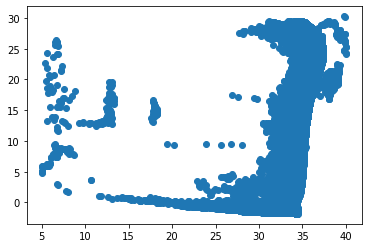

In [28]:
plt.scatter(woa_annual['s_an'], woa_annual['tpot'])

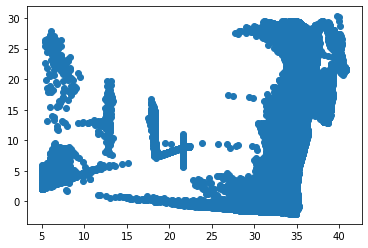

In [34]:
# this here is obviously wrong when using in-situ temperature:
plt.scatter(woa_annual['s_an'], woa_annual['t_an'])

In [61]:
def TS_diagram(T,S):
    sdummy = np.arange(0,50)
    tdummy = np.arange(-2,35)
    sdummy2, tdummy2 = np.meshgrid(sdummy, tdummy)
    densdummy = gsw.sigma0(sdummy2, gsw.CT_from_pt(sdummy2,tdummy2))
    plt.figure(figsize=[8,8])
    C = plt.contour(sdummy, tdummy, densdummy, np.arange(0,50,5), colors='k')
    plt.clabel(C)
    plt.scatter(S,T)
    plt.xlabel('Salinity (PSU)')
    plt.ylabel('Potential Temperature (deg C)')

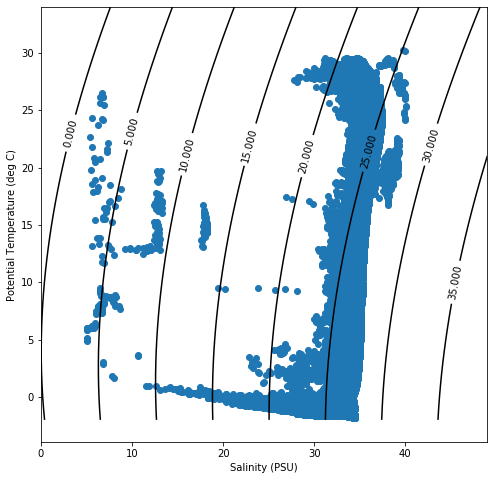

In [62]:
TS_diagram(woa_annual['tpot'], woa_annual['s_an'])